In [1]:
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt

# load data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# sample and copy for data management 
df.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
413389,Data Scientist,Data Scientist,"Charlotte, NC",via LinkedIn,Contractor,False,Georgia,2023-02-24 17:04:49,False,False,United States,None,NaN,NaN,Radiansys Inc.,"['python', 'pandas', 'numpy', 'tensorflow']","{'libraries': ['pandas', 'numpy', 'tensorflow'..."
257491,Data Analyst,Sr. Data Analyst - Now Hiring,"Charlotte, NC",via Snagajob,Full-time,False,Georgia,2023-04-13 07:39:58,False,False,United States,None,NaN,NaN,CRG,"['sql', 'tableau', 'excel']","{'analyst_tools': ['tableau', 'excel'], 'progr..."
246958,Business Analyst,"Business Analyst, Screening Services, Operational","San José Province, San José, Costa Rica",via BeBee,Full-time,False,Costa Rica,2023-08-26 07:44:30,False,False,Costa Rica,None,NaN,NaN,Amzn Support Srvcs Costa Rica,"['sql', 'excel', 'tableau', 'power bi']","{'analyst_tools': ['excel', 'tableau', 'power ..."
770293,Data Engineer,Head of Data Engineering,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-09-26 01:41:57,False,False,Singapore,None,NaN,NaN,Employer details provided on application.,None,None
644675,Business Analyst,Marketing Analyst,Jordan,via Jordan.tanqeeb.com,Full-time,False,Jordan,2023-12-20 12:37:25,False,False,Jordan,None,NaN,NaN,Chemonics International,None,None


In [3]:
# copy - makes copy of obj indices ad data 
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

In [4]:
# df_org = df_altered  - means assigned (any changes made to df_org will change other as well)
df_altered = df_original.copy()

In [5]:
print("ID of original :     ", id(df_original))
print("ID 0f altered:      ", id(df_altered))
print(" are two of them same :     ", id(df_original) == id(df_altered))

ID of original :      13098549904
ID 0f altered:       6304045776
 are two of them same :      False


In [10]:
# PIVOT TABLE 
# INDEX - Col or name ( we be grouping by)
# agg func - min max whatever 
# values - column to agg 
#column = keys to group by on pivot 
# size - count alll rows in columns 

df.pivot_table(values = 'salary_year_avg', index = 'job_country',columns ='job_title_short',  aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


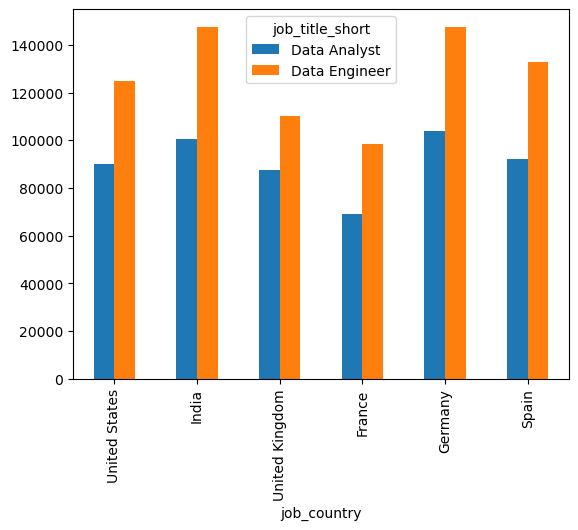

In [21]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(values = 'salary_year_avg', index = 'job_country',columns ='job_title_short',  aggfunc='median')

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ["Data Analyst", "Data Engineer"]

df_job_country_salary = df_job_country_salary[job_titles]



df_job_country_salary.plot(kind = 'bar')

plt.show()